# Machine Learning Engineer Nanodegree

## Capstone Project - Stock Predictor

#### Aswin Ramani 
#### 5th March 2018

## I. Definition

### Project Overview


#### Problem Domain

Many investment firms have been using financial models for predicting stock prices to yield profits.  Applying machine learning for stock prediction is a very popular and a profitable real-world problem. Hence, there's no surprise that many would be interested in finding a great prediction algorithm to make tons of money. 

#### Project Origin

The stock prediction has been performed for quite some time and it is important to discuss some of the key concepts (theories or hypotheses)  in this domain.

##### Random Walk Theory

Random walk theory states that the changes in stock prices are unpredictable regardless of the past movements which imply that the uncertainty of a stock price going up is equal to going down(Malkiel 1973; “Eugene Famaâs Efficient Market Hypothesis,” n.d.)(Malkiel 1973). This important financial theory got its name from a book (A Random Walk Down Wall Street) which was written by Burton Malkiel in 1973.

##### Efficient Market Hypothesis

Random walk theory was later superseded and explained by the efficient market hypothesis (Malkiel 1973).  According to the efficient market hypothesis, it is impossible to "beat the market" because the stocks are priced accurately and reflect all available information (“Eugene Famaâs Efficient Market Hypothesis,” n.d.).   As per this hypothesis, investors are taking a gamble when they buy or sell a security as there is no guarantee they could buy a stock at a bargain price and sell at a much higher price to make a profit. This implies that investors have to buy a higher risk investment to make profits. However many investors (most notably Warren Buffet) have made profits consistently over a substantial span of time. 

##### Fundamental Analysis

Fundamental Analysis is a complete top to the bottom approach where the analysts tend to study all factors that could influence the stock's value. They are the overall economy, country's economy, sector analysis and company analysis. With the help of fundamental analysis, investors should be able to compare the current price of a stock against their own calculated intrinsic value which could possibly give them a good indication of whether a stock is undervalued or overvalued.

##### Technical Analysis

The purpose of doing technical analysis is to predict a stock's price based on its past movements. Technical analysis assumes that the fundamental analysis has already been accounted for a company's current stock price.  This type of investment strategy is generally used by short-term investors, where holding periods could range anywhere from seconds to weeks.

##### Datasets and Inputs 

The dataset contains both metrics that we get from Quandl (resource for getting historical stock data) and derived metrics. Date, ticker, adjusted open, adjusted low, adjusted high, adjusted close are the metrics that we get from Quandl. There are two important types of indicators which are leading and lagging indicators. The technical indicators are simple momentum, RSI (Relative Strength Index), SMA (simple moving average), TRIMA (triangular moving average), and WMA (weighted moving average). TA-Lib (external library) would be used for computing technical indicators based on stock data. 

### Problem Statement

To build a stock price predictor that makes use of past trading data to produce projected estimates. The dataset that would be used to develop the machine learning model will predict the adjusted close price of a stock, which is a numerical value. The prediction would be made for the next seven trading days.

#### Solution 

Usage of technical indicators registers the implementation of technical analysis strategy for stock price prediction. Since the output to be predicted is a continuous value, supervised learning regression algorithms would be used.  Historical stock data would be used along with the technical indicators to train the model. 

Support Vector Machine (SVR, LinearSVR), Kernel Ridge Regression (KRR) and Multi-layer Perceptron (MLPRegressor) are the supervised learning algorithms that would be used to train the model. 

The prediction results would be saved to a CSV file which would contain the projected estimates made by our benchmark (Linear Regression) and best models. The best model would be chosen based on the performance of evaluation metric.   

### Metrics

Choosing the model that fits the data implies that the best regression is the one that minimizes the error.  There's a fundamental ambiguity when you use the absolute value of errors in terms of where the regression can fall because there could be multiple lines that minimize absolute error, but there only one line that could minimize error squared. The ambiguity does not exist when we use the absolute value of the distance squared.

When the data points increase, SSE (sum of squared error) will also increase. Large SSE could be interpreted as a poor fit and this is a shortcoming of using SSE as an evaluation metric. We might have a model that fits well and end up having large SSE because of the dataset size.  However, this will not be a problem for our task because we use the same data for training different models.  

Although we could make use of SSE, I prefer to use R-squared over SSE because it explains the relationship between the input and output. 

#### Coefficient of determination (r^2)

To determine how well the model fits the data we need to check if the differences between the actual observed values and the predicted values are small and unbiased. The coefficient of determination (r^2) is a statistical measure that explains the proportion of the variance in the dependent variable that is predictable from the independent variable.  It provides a measure of how well the predictions are done by the model for the future samples. Higher coefficient indicates that larger number of data points fall within the regression line.  The r-squared score of 0 indicates that none of the data points fall within the regression line, while 1 indicated that the regression line represents all data points and negative scores indicate that the model has poorly fitted the data. A higher coefficient is considered as the goodness of fit. The formula for R-squared is given by 




## II. Analysis

### Data Exploration 

In [1]:
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = "APIKEY"
from IPython.display import display
import arrow 

default_date_format = "YYYY-MM-DD" 
today = arrow.now()
start_date = today.replace(years=-15, days=-1).format(default_date_format)
end_date = today.replace(days=-1).format(default_date_format)
tickers = ["MSFT"]
columns = ["date", "ticker","adj_open", "adj_low", "adj_high", "adj_close"]
data = quandl.get_table("WIKI/PRICES", qopts = { "columns": columns }, ticker = tickers, date = { "gte": start_date, "lte": end_date })
data.index = data["date"].values
data.drop(["date", "ticker"], axis=1, inplace=True)
display(data.head())

,adj_open,adj_low,adj_high,adj_close
2003-03-04,15.748192,15.400903,15.801621,15.407582
2003-03-05,15.407582,15.394225,15.728156,15.654691
2003-03-06,15.474368,15.447654,15.694763,15.541154
2003-03-07,15.327439,15.294045,15.888443,15.734835
2003-03-10,15.567869,15.287367,15.668048,15.327439


We can see the the first five rows of input metrics that we get from Quandl. Lets discuss about the technical indicators. 

#### Leading and Lagging Indicators

Leading indicators are created to lead or move forward the price movements of a security thereby providing better predictive capabilities when compared to lagging indicators because lagging indicators follow the price movements/trends. Examples of leading indicators are momentum, commodity channel index, stochastic oscillator, RSI etc. Examples of lagging indicators are moving averages, Bollinger Bands, MACD etc. 

##### Momentum

Momentum measures the rate of change in price over a period of time indicating whether the price has increased which could mean its a positive momentum or decreased which could be considered as a negative momentum. Formula for calculating momentum is 

	Momentum[t]  =  price[t] /  price[t-n] - 1
    
 where, Momentum[t] and price[t]  is momentum and price (in our case we use adjusted close) on a particular day               price[t-n] is the price n days earlier. 
	
    
##### RSI

Relative Strength Index measures both speed and price change over a period of time by the relative strength which is calculated by dividing average gain by average loss over a period of time. The formula for calculating RSI is 

	RSI =  100 -    ( 100 / 1 + RS )
    
 		where RS =  Average Gain / Average Loss  
        
The range for RSI is between 0 and 100.  RSI value of 70 is considered as an overbought condition and 30 as an oversold condition. Now let's add these two to the dataset.

In [2]:
from talib import MOM, RSI
adj_close = np.array(data["adj_close"])
data["mom"] = MOM(adj_close, timeperiod=10)
data["rsi"] = RSI(adj_close, timeperiod=14)
display(data.head(15))

,adj_open,adj_low,adj_high,adj_close,mom,rsi
2003-03-04,15.748192,15.400903,15.801621,15.407582,NaN,NaN
2003-03-05,15.407582,15.394225,15.728156,15.654691,NaN,NaN
2003-03-06,15.474368,15.447654,15.694763,15.541154,NaN,NaN
2003-03-07,15.327439,15.294045,15.888443,15.734835,NaN,NaN
2003-03-10,15.567869,15.287367,15.668048,15.327439,NaN,NaN
2003-03-11,15.400903,15.200545,15.534476,15.227259,NaN,NaN
2003-03-12,15.233938,15.060294,15.654691,15.621298,NaN,NaN
2003-03-13,15.841692,15.654691,16.522912,16.476162,NaN,NaN
2003-03-14,16.482840,16.202338,16.669842,16.603055,NaN,NaN
2003-03-17,16.375982,16.249088,17.331025,17.317668,NaN,NaN


We can see that the first 11 row values for MOM and 14 row values for rsi as NaN. This is because we are calculating these metrics over a time period which implies that initial periods for these two would be NaN values. In order to handle this pandas provides with functions that would fill the NaN values. Let us see how these NaN values get replaced. 

In [3]:
def fill_missing_values(df):
    # Drop nan values if all are nan
    df.dropna(how="all", inplace=True)
    # Forward Fill
    df.fillna(method="ffill", inplace=True)
    # Backward Fill
    df.fillna(method="backfill", inplace=True)
    return df

fill_missing_values(data)
display(data.head(15))

,adj_open,adj_low,adj_high,adj_close,mom,rsi
2003-03-04,15.748192,15.400903,15.801621,15.407582,1.983551,66.371681
2003-03-05,15.407582,15.394225,15.728156,15.654691,1.983551,66.371681
2003-03-06,15.474368,15.447654,15.694763,15.541154,1.983551,66.371681
2003-03-07,15.327439,15.294045,15.888443,15.734835,1.983551,66.371681
2003-03-10,15.567869,15.287367,15.668048,15.327439,1.983551,66.371681
2003-03-11,15.400903,15.200545,15.534476,15.227259,1.983551,66.371681
2003-03-12,15.233938,15.060294,15.654691,15.621298,1.983551,66.371681
2003-03-13,15.841692,15.654691,16.522912,16.476162,1.983551,66.371681
2003-03-14,16.482840,16.202338,16.669842,16.603055,1.983551,66.371681
2003-03-17,16.375982,16.249088,17.331025,17.317668,1.983551,66.371681


We can see that pandas has filled the NaN values with first calculated value for both momentum and RSI. 

##### Simple,  Triangular and Weighted Moving Averages

Moving average is also called as rolling average where we add up the adjusted close prices for a particular time period and then we divide the total by that time period. The difference between these three moving average is the amount of weight that's being applied to them to calculate the average. Simple Moving Average considers that the entire series of data as equally important to calculate moving average whereas triangular and weighted moving averages give more weight to the middle and recent prices respectively.

##### Purpose/Significance of Using Moving Averages

Moving averages identify if a security's price is trending upwards or downwards.  This could be very helpful metric as we intend to predict adjusted close prices for a period of 7 days.  Moving averages could be used to generate buy and sell signals as well which is out of scope for this project.  For our problem, we can make use of the 20-day rolling period. 


In [4]:
from talib import SMA, TRIMA, WMA
n_days = 20
data["sma"] = SMA(adj_close, timeperiod=n_days)
data["trima"] = TRIMA(adj_close, timeperiod=n_days)
data["wma"] = WMA(adj_close, timeperiod=n_days)
data["adj_pred"] = data["adj_close"].shift(-7)
fill_missing_values(data)
display(data.head(21))

,adj_open,adj_low,adj_high,adj_close,mom,rsi,sma,trima,wma,adj_pred
2003-03-04,15.748192,15.400903,15.801621,15.407582,1.983551,66.371681,16.465142,16.707546,16.745151,16.476162
2003-03-05,15.407582,15.394225,15.728156,15.654691,1.983551,66.371681,16.465142,16.707546,16.745151,16.603055
2003-03-06,15.474368,15.447654,15.694763,15.541154,1.983551,66.371681,16.465142,16.707546,16.745151,17.317668
2003-03-07,15.327439,15.294045,15.888443,15.734835,1.983551,66.371681,16.465142,16.707546,16.745151,17.391133
2003-03-10,15.567869,15.287367,15.668048,15.327439,1.983551,66.371681,16.465142,16.707546,16.745151,17.578134
2003-03-11,15.400903,15.200545,15.534476,15.227259,1.983551,66.371681,16.465142,16.707546,16.745151,17.531384
2003-03-12,15.233938,15.060294,15.654691,15.621298,1.983551,66.371681,16.465142,16.707546,16.745151,17.745100
2003-03-13,15.841692,15.654691,16.522912,16.476162,1.983551,66.371681,16.465142,16.707546,16.745151,16.890236
2003-03-14,16.482840,16.202338,16.669842,16.603055,1.983551,66.371681,16.465142,16.707546,16.745151,17.023809
2003-03-17,16.375982,16.249088,17.331025,17.317668,1.983551,66.371681,16.465142,16.707546,16.745151,16.863522


Note that moving averages will also have NaN values intially just like momentum and RSI. We make use of pandas fillna function to handle this. Since we need to predict the stock prices for the next seven days I have added the adj_pred column to the dataset. Now let's split the dataset into features and target. 

In [5]:
features = data.drop("adj_pred", axis=1)
target = data["adj_pred"]



### Data Visualization 

Let's visualize the input metrics first. 

3774


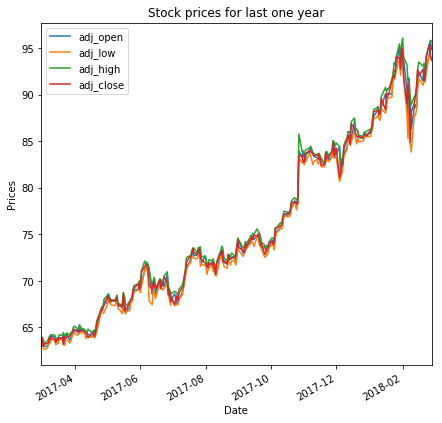

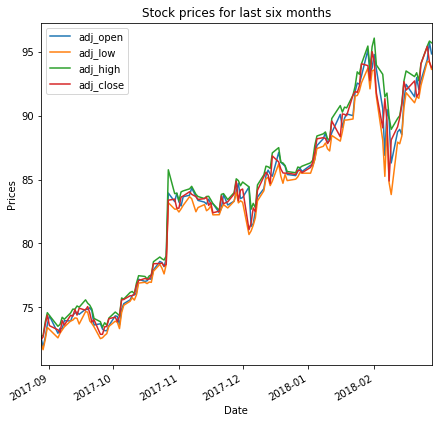

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Prices", kind='line'):
    ax = df.plot(title=title, kind=kind)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper left')
    plt.show()
    
print len(data)
input_metrics = features.columns.values[:len(features.columns.values) - 5]
# data for last one year
plot_data(features[input_metrics].tail(252), title="Stock prices for last one year")
# data for last six months 
plot_data(features[input_metrics].tail(126), title="Stock prices for last six months")

From the above graphs we can clearly all the four metrics follow each other closely, which indicates that the distribution of these would be similar. 

Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall distribution. Generally high kurtosis value indicates fat tails. 

Skewness is a statistical measure of the symmetry in a distribution. Skewness of a symmetrical data is 0. High skewness indicates the degree of asymmetry from normal distribution. 

Features that are highly skewed need to be transformed because algorithms are sensitive to these data. As rule of thumb skewness is considered as high if it is either greater than 1 (positive skewness) or lesser than -1 (negative skewness). 

So, let'visualize the distribution for adjusted close price, by plotting a histogram.

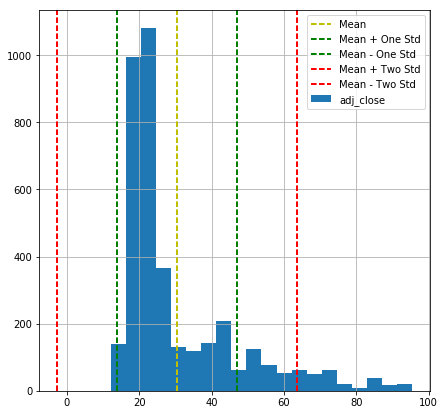

skewness = 1.69853725155
kurtosis = 2.31029442252


In [7]:
def plot_histogram(df, feature):
    df.hist(bins=20, label=feature)
    mean =  df.mean()
    std = df.std()
    kurt = df.kurtosis()
    skew = df.skew()
    plt.axvline(mean, color='y', linestyle='dashed', linewidth=2, label="Mean")
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=2, label="Mean + One Std")
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=2, label="Mean - One Std")
    plt.axvline(mean + (2 * std), color='r', linestyle='dashed', linewidth=2, label="Mean + Two Std")
    plt.axvline(mean - (2 * std), color='r', linestyle='dashed', linewidth=2, label="Mean - Two Std")
    plt.legend(loc='upper right')
    plt.show()
    print "skewness = {}".format(skew)
    print "kurtosis = {}".format(kurt)
# for col in data.columns.values:
plot_histogram(features["adj_close"], "adj_close")

We can see that distribution of adjusted close price is positively skewed. This is because we are using 15 years of  historical data. Last 15 years includes the recession period during which the stock prices plummeted down as a whole. In order to confirm lets plot histogram and calculate the statistics for much lesser time period. 

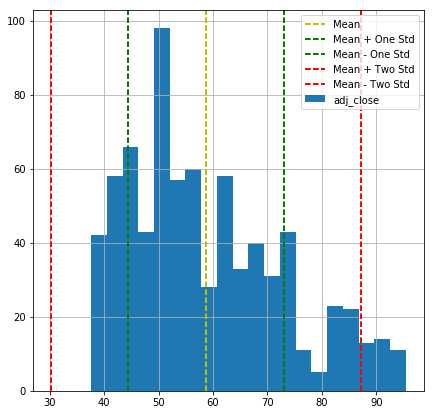

skewness = 0.685382556504
kurtosis = -0.37773291218


In [8]:
plot_histogram(features["adj_close"].tail(756), "adj_close")

Now we can clearly see that distribution is moderately skewed. The volatile nature of stock prices could also affect the skewness. So, let's apply logarithmic transformation to all the features that are highly skewed and make their distribution more normal.

In [9]:
def log_transform(x):
    mod = 1
    if np.sign(x) < 0:
        x = abs(x)
        mod = -1
    return mod * np.log(x + 1)

def verify_skewness(df):
    for feature in df.columns.values:
        skewness = df[feature].skew()
        if skewness < -1 or skewness > 1:
            print "high skewness for {}, skewness = {}".format(feature, skewness)
            # apply log  
            df[feature] = df[feature].apply(lambda x: log_transform(x))     
            print "after transformation ", df[feature].skew()
    return df

feature_transformed = verify_skewness(features)

high skewness for adj_open, skewness = 1.70037955512
after transformation  0.9987961423
high skewness for adj_low, skewness = 1.69778643045
after transformation  0.992803471104
high skewness for adj_high, skewness = 1.70227866893
after transformation  1.00362525664
high skewness for adj_close, skewness = 1.69853725155
after transformation  0.996858738958
high skewness for sma, skewness = 1.68303197646
after transformation  1.00043417886
high skewness for trima, skewness = 1.68247857057
after transformation  0.99938094694
high skewness for wma, skewness = 1.68771791414
after transformation  1.00118600116


We can see that the skewness has reduced after transformations. Now let's visualize adjusted close price along with leading technical indicators. 

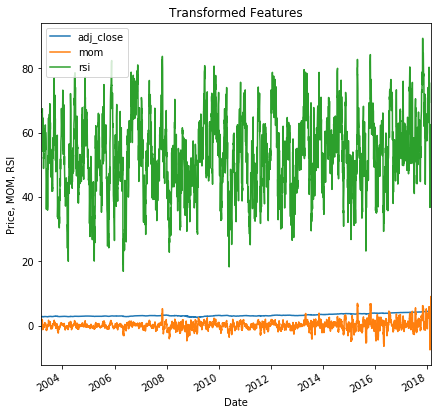

In [10]:
plot_data(feature_transformed[["adj_close", "mom", "rsi"]], title="Transformed Features", ylabel="Price, MOM, RSI")

We can clearly see that three features adjusted close price, momentum and rsi have different ranges of values. In order to compare these properly, we need to normalize these features and then visualize. Normalization of features mainly done in order to make sure that algorithms treat the features equally. However normalization seem to be helpful for visualization as well.

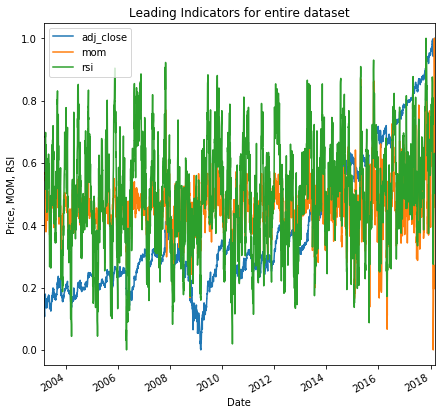

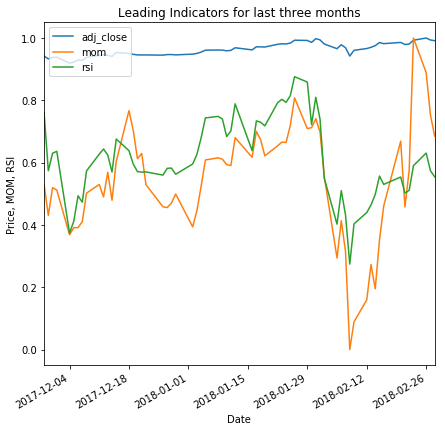

In [11]:
from sklearn.preprocessing import MinMaxScaler
def normalize_df(df):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(data=data, index=df.index.values, columns=df.columns.values)
    return normalized_df

feature_final = normalize_df(feature_transformed)

plot_data(feature_final[["adj_close", "mom", "rsi"]], title="Leading Indicators for entire dataset", ylabel="Price, MOM, RSI")
plot_data(feature_final[["adj_close", "mom", "rsi"]].tail(63), title="Leading Indicators for last three months", ylabel="Price, MOM, RSI")

Looking at the graph with full data, we can see that RSI and momentum follow each other very closely. However looking at the graph for last three months we can see the difference between RSI and momentum. Momentum seems to oscillate more than rsi whenever there is a change in price movement. This could possibly be because of the fact the RSI considers average gains and average losses over a period of time, whereas momentum only considers the price. There is clear visual evidence in the third graph that RSI leads the adjusted close price between 2018-01-28 and 2018-02-12. Infact, RSI begins to lead the price even before momentum does in this period probably because of different time periods being considered for their calculation. Now let's visualize the moving averages with adjusted close price. 

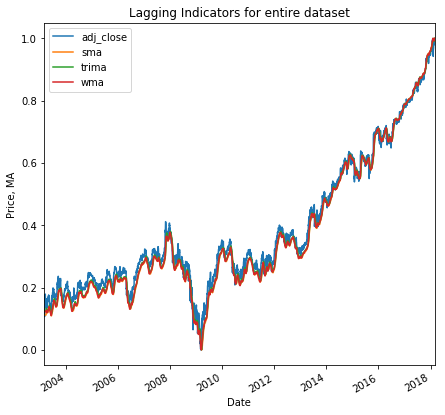

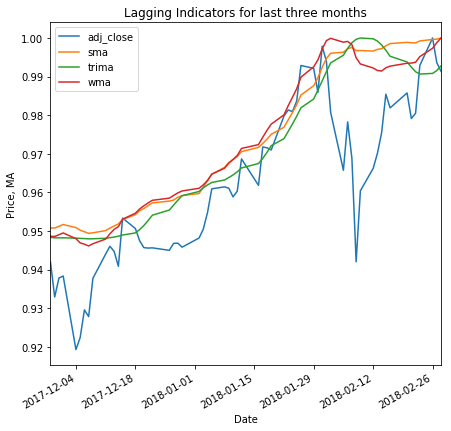

In [12]:
plot_data(feature_final[["adj_close", "sma", "trima", "wma"]], title="Lagging Indicators for entire dataset", ylabel="Price, MA")
plot_data(feature_final[["adj_close", "sma", "trima", "wma"]].tail(63), title="Lagging Indicators for last three months", ylabel="Price, MA")


We can see the difference between the three moving averages in the second graph. In the second graph the difference is  noticeble especially between 2018-01-28 and 2018-02-12. In this period we can notice that the weighted moving average starts to decline along with the price as it applies more weight to the recent prices, while the triangular moving average seem to incline and simple moving average seems to level out /flat and then increase. This indicates that triangular takes more time to react to the price changes when compared to weighted and simple moving averages. Clearly there seems to be more lag for triangular moving average which give more weightage to the middle part of the time period. At the end we can see that the triangular moving is about to increase or start its uptrend while the other two averages have already reacted to the increase in price trend. Triangular moving average needs to be interpreted differently to other two moving averages especially when it's is volatile because of more lag. Now lets visualize all technical indicators for the last three months.

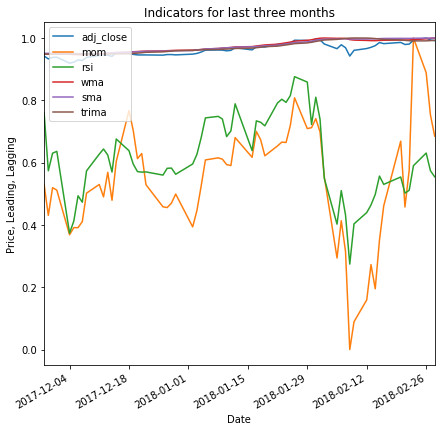

In [13]:
plot_data(feature_final[["adj_close", "mom", "rsi", "wma","sma", "trima"]].tail(63), title="Indicators for last three months", ylabel="Price, Leading, Lagging")

The above visualization shows the difference between leading and lagging indicators. We can see that the lagging indicators (moving averages) are less sensitive and decline gradually, while leading indicators (RSI and momentum) tend to lead the price movements and naturally they are more sensitive to rapid price changes (volatile) that happens  between 2018-01-28 and 2018-02-12. Lets take a look at the complete dataset.

In [14]:
display(feature_final.head())

,adj_open,adj_low,adj_high,adj_close,mom,rsi,sma,trima,wma
2003-03-04,0.121043,0.120411,0.111220,0.112286,0.567342,0.683488,0.111964,0.12626,0.122832
2003-03-05,0.110745,0.120208,0.108999,0.119779,0.567342,0.683488,0.111964,0.12626,0.122832
2003-03-06,0.112781,0.121834,0.107987,0.116350,0.567342,0.683488,0.111964,0.12626,0.122832
2003-03-07,0.108291,0.117143,0.113831,0.122185,0.567342,0.683488,0.111964,0.12626,0.122832
2003-03-10,0.115618,0.116938,0.107175,0.109832,0.567342,0.683488,0.111964,0.12626,0.122832


 All the metrics are numerical values. The dataset is time-series continuous data. 

### Algorithms and Techniques

#### Support Vector Machine

Support Vector Machine is a supervised learning algorithm. The ultimate goal of support vector machine is to maximize the robustness of the model, thereby producing a model that generalizes well. This idea of using SVM has been extended to solve regression problems.  

The cost function that is required to generate the model ignores any training data that is close to model prediction. SVR intends to minimize the deviation of data points that the curve fits.  Kernel functions make the SVM more versatile by offering different pattern analyses for different datasets. If the dataset is linearly separable then linear kernel could be used or RBF kernel could be used for non-linear regression as it fits a curve which could possibly generalize better. The available kernel functions for SVR are linear, RBF, polynomial, sigmoid and precomputed.  Apart from these, we could specify our own custom kernel functions. 
						
Although there are many kernel functions, I would be using linear and RBF kernels.  Radial Basis Function kernel creates non-linear combinations of features and then transforms them into high dimensional feature space to perform the linear separation. 

#### Grid Search Technique

In RBF kernel we need to take care of two important parameters C and gamma to get the best of SVR.   In order to select the best combination of C and gamma, (which gives us the model that generalizes well) we use a technique called as grid search technique. This grid search technique could be used to optimize our learning algorithm by using a table which consists of columns with different kernels values (linear and polynomial) and rows with different exponential values of gamma.  Then, choose the model which has a better r2 (coefficient of determination) score. 


#### Multilayer Perceptron 

MLP is a supervised learning algorithm. MLP is a type of artificial neural network. ANN's are based on how the neurons in the human brain process information. Each neuron in a neural network receives it's input from other neurons or nodes and then computes the output.  
Each input contains an associated weight, which is based on the relative importance of itself to other inputs. Hence each node is a representation of the weighted sum of its inputs.
 
Output = f(W1X1 + W2X2 + ... + WnXn + b) 
        where W1, W2, Wn are associated weights
                X1, X2, Xn are inputs 
				b is bias.
				f is the activation function  that you apply to the above result. 

The purpose of having a bias is that gives a trainable constant value to each and every in order to get the desired output. Let's say for example if your desired output should have a minimum value of  1 and all your inputs are zeros. This would mean that your input of zeros will result in the output of 0 which makes this a linear function. For this purpose, if we have a bias in place then we would be able to get the desired output. Bias helps the network to generalize better.   

In real-world scenarios, we would come across many datasets which are non-linear. In order to address this, we make use of activation function.  For our problem, we would be using ReLu activation function (Rectified Linear Unit) and this is given by 
		 f(x) = max(0, x). 
By looking at the formula we can clearly see that it would discard the negatives values which is why it decides between 0 and some value x. It would choose the one that is greater. When traversing from one local maximum to minimum the gradient reduces exponentially resulting in negative activations and slow training. By applying ReLu to the entire set we make the training faster with less impact on the accuracy. ReLu activation function helps in reducing the training time and make computation much faster than other activation functions like sigmoid and tanh.  

MLP is a feed-forward neural network, meaning that information flows in one direction only. MLP contains three layers and they are input, hidden and output layers. No computation is performed in the input layer. Input layer passes the information that it gets from the previous node to the hidden. Hidden layers take care of the computations (activation function getting applied to the weighted sum of inputs) and transfer the computed information to the output layer. Further computations are performed in the output layer (like loss function) and then we finally get the output for MLP.  

The learning part of MLP is done by the backpropagation algorithm. Initially, the weights are assigned randomly. The output of MLP is compared to our desired output and the error gets propagated back to the previous layers and the weights are adjusted accordingly. The process is repeatedly performed until the error reduces below the threshold. In our case, we make use of square error as loss function and this explained below. 

#### Sklearn Implementation of MLP

MLP can learn a non-linear function approximator for a given a set of n features and a target as there can be one or more number of non-linear layers called as hidden layers which exist in between the input layer which contain n features and the output layer. Given a set of x features that form the input layer. These features could be thought of like a set of neurons in our brain. Each and every feature transforms the values from the previously hidden layer to the next one with a weighted linear summation W1X1 + W2X2 + ....  + WmXm and then followed by non-linear activation function g(.) : R ---> R -.  The output layer finally transforms the values received from the last hidden layer into the output.  MLP works well for non-linear models.  MLPRegressor trains the model using the backpropagation with no activation function in the output layer. This indirectly means that MLPRegressor would be identity function as the activation function. Hence it uses square error as loss function.

#### Kernel ridge regression

The model learned by KRR is identical to SVR but the difference lies in the loss functions.  SVR uses the epsilon-insensitive loss while uses squared error.  KRR is a combination of ridge regression (linear least squares with l2-norm regularization) and kernel trick.  When the dataset is medium size KRR could perform better than SVR. Since I am giving the option to choose the time period to train the stocks which will be discussed in project design.  As mentioned in the sklearn documentation,  fitting the kernel ridge is roughly seven times faster than SVR. However, SVR estimates better when the training set gets bigger. 

#### TimeSeriesSplit 

Before training the data points we need to split the data into training and testing sets in order to avoid bias. For this task, I would be using TimeSeriesSplit for splitting in order to avoid look ahead bias as we have to make predictions for time series continuous output. Cross-validation done in this is a variation of K Fold Cross Validator. 

### Benchmark

Simple linear regression machine learning model is the benchmark that I would be comparing to the solution model to prove that this problem is solvable. Linear regression would fit poorly for non-linear dataset and in this case it cannot be considered as an established result. As the name suggests, Linear regression performs very well when the data is linear.  

## III. Methodology

### Data Preprocessing


After computing the values for technical indicators there were many rows at the beginning that had NaN values. This is because we are calculating these metrics over a time period which implies that initial periods for these two would be NaN values. In order to handle this, pandas provides fillna function that would fill the NaN values. 

The last seven row values for our target column (prediction for next seven days) would be NaN. Pandas would take the last known value and fill that to replace the NaN values. 

When filling NaN values we always perform forwards and then backward. 

Feature transformation would be performed for features that are highly skewed. Algorithms that we use for this task could be sensitive to the skewed dataset. In order to handle this, a function which detects skewness and then applies logarithmic transformation was implemented. As rule of thumb skewness is considered as high if it is either greater than 1 (positive skewness) or lesser than -1 (negative skewness). 

Since log of 0 is undefined, for negative values we take the absolute value, apply the logarithmic transformation and then multiply the transformed feature by -1.

After applying log transformations for the skewed features we then normalize the entire features in order to ensure that the algorithm treats all the features equally.  For this, I have used MinMaxScaler from the sklearn library. 

### Implementation


#### Unoptimized Model Implementation

Before training the data points we split the data into training and testing sets using TimeSeriesSplit from the sklearn library in order to avoid lookahead bias as we are trying to make time-series prediction. 

We make use of r-squared score to find the model that fits the data. For this, I have implemented a function which takes the model that has the highest r-squared score and then performs grid search technique. If the optimized r-squared score is better than the unoptimized one then the optimized estimator would be used for making final predictions.  

In [15]:
X = feature_final.drop(feature_final.tail(7).index.values)
y = target.drop(target.tail(7).index.values)
import model 
results = model.split(X, y)


KernelRidge

                   50%       75%      100%
1_r2          0.538866  0.612803 -0.646333
2_train_time  0.036240  0.159405  0.419362
3_pred_time   0.013270  0.027477  0.044987

SVR

                   50%       75%      100%
1_r2          0.905193  0.922869  0.774652
2_train_time  0.049995  0.204914  0.464709
3_pred_time   0.016351  0.031809  0.047776

LinearSVR

                   50%       75%      100%
1_r2          0.866641  0.810367 -0.164787
2_train_time  0.001903  0.003415  0.005109
3_pred_time   0.000083  0.000082  0.000099

LinearRegression

                   50%       75%      100%
1_r2          0.876574  0.807860 -0.074997
2_train_time  0.000866  0.000635  0.000826
3_pred_time   0.000142  0.000107  0.000080

MLPRegressor

                   50%       75%      100%
1_r2          0.824994  0.900105  0.758858
2_train_time  0.317959  0.607127  0.894631
3_pred_time   0.000745  0.000716  0.000618


From the above results we can clearly see that SVR and MLPRegressor have better r-squared score compared to other, clearly indicating the non-linearity in the dataset. We can also see that Linear regression and LinearSVR seemed to perform better when dataset size is lesser. Based on the above results we can clearly see that SVR is the best model. Lets confirm that by making use of function that gets the best model based on performance metric.(r-squared error)

In [16]:
def get_best_model(results):
    alg = dict((key,value) for key, value in results.iteritems() if key != 'LinearRegression')
    max_val = max(alg.values())
    pred_alg = dict((key,value) for key, value in alg.iteritems() if value == max_val)
    return pred_alg
best_model = get_best_model(results)
display(best_model) 

{'SVR': 0.77465200038414017}

#### Refinement/Optimized Model Implementation

As mentioned above grid search cross-validation technique take cares of the optimizing the best algorithm. In grid search technique, we give few different combinations of parameters and performance metric (in our task it's r-squared error) and it will figure out the best combinations to give us the best estimators. It would pick the model that has the highest r-squared score. 


In [17]:
pred_alg, estimator = model.split_train_results(results, X, y)

unoptimized  0.774652000384
optimized  0.419725200026
unoptimized model parameters 
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

grid fit parameters 
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.10000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


We can see that our optimized model has lesser r-squared error which means that we would not use it for making final predictions. There is a significant difference between the two so we need to make use of the unoptimized model. Note that the unoptimized model has been cross-validated using TimeSeriesSplit.

## IV. Results


### Model Evaluation and Validation

The final model seems to fits the data reasonably well. The final parameters are the same as the initial one because as per my implementation the model that scores better would be chosen. The C parameter makes the difference between optimized and unoptimized models. This show how important the C parameter when it comes to training the non-linear data. 

Small perturbations will not greatly affect the results which make the model robust enough to solve the intended problem, which is to make predictions. The results after model evaluation seem to suggest that the model could be trusted, however, we need crosscheck the actual price and our prediction price over a period and then come to a conclusion. In other words, the initial set up to make a very good prediction algorithm has been done. 

### Justification

Our Benchmark model is Linear Regression. As the name suggests Linear regression fits linear data. The r-squared score for our benchmark is in negative as mentioned earlier, which implies that it poorly fits the data. Given the fact that we have a non-linear it is reasonable to see why Linear Regression performs poorly.  Clearly, we see that our algorithm has outperformed the benchmark model. The final solution as discussed before seems to be significant enough to have solved the problem

## V. Conclusion

### Free-Form Visualization

The important quality that I saw in this project was the significance of leading technical indicators and how important these could be for final predictions. Let's visualize.  

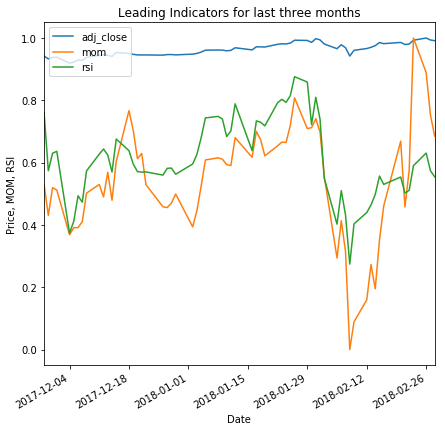

In [18]:
plot_data(feature_final[["adj_close", "mom", "rsi"]].tail(63), title="Leading Indicators for last three months", ylabel="Price, MOM, RSI")



It is quite amazing to observe and realize that RSI is a very good leading technical indicator. Looking at the graph we can clearly that RSI leads the adjusted close price (between 2018-01-29 and 2018-02-12) which is what leading technical indicators tend to do, but to realize this practically was something special for me when I was working on this project. Usually there's so much of a difference between theoritical and practical aspects. I could'nt agree more when all the resources clearly mentioned that leading technical have predictive abilities. This visualization is significant enough for me to justify the purpose of using this as a feature.    


### Reflection

Applying logarithmic transformation for negative values took me some time to figure out because the log of 0  is undefined. 

Choosing the algorithms for this problem and then implementing the function that gets the best out of them was tricky because algorithms perform differently for different time periods. 

I believe that data preprocessing, initial algorithms selection and implementing the function/functions to get the best model to make predictions as the most interesting /difficult part of the problem.

### Improvement

Deep learning algorithms like LSTM could be used to potentially improve the performance of prediction.  

Fundamental Analysis along with sentiment analysis could be used to improve the prediction accuracy.

I would certainly consider this as a benchmark because there's always a possibility of finding better solutions and continue to make improvements. 
